In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data = pd.read_csv('/content/drive/MyDrive/Working Space/Data_coffee/Data_coffee_complete.csv')
Data

,field1,Name,NewCode,code,Groupping,Sweetness,L,A,B,density,...,histidine,arginine,valine,metheonine,tyrosine,isoleucine,leucine,phynylalanine,Tryptophan,adenosine
0,0,DC1,DC8001-1,F1,1,17.5,44.83,0.45,11.11,0.67,...,26.76,136.15,60.93,12.10,40.74,39.18,52.01,61.76,185.23,46.94
1,1,DC1,DC8001-2,F1,1,17.5,44.83,0.45,11.11,0.67,...,26.76,136.15,60.93,12.10,40.74,39.18,52.01,61.76,185.23,46.94
2,2,DC1,DC8001-3,F1,1,17.5,44.83,0.45,11.11,0.67,...,26.76,136.15,60.93,12.10,40.74,39.18,52.01,61.76,185.23,46.94
3,3,DC1,DC8001-4,F1,1,17.5,44.83,0.45,11.11,0.67,...,26.76,136.15,60.93,12.10,40.74,39.18,52.01,61.76,185.23,46.94
4,4,DC1,DC8001-5,F1,1,17.5,44.83,0.45,11.11,0.67,...,26.76,136.15,60.93,12.10,40.74,39.18,52.01,61.76,185.23,46.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,221,BK1,BK-10001-2,F48,6,15.0,49.48,1.25,11.67,0.68,...,37.02,381.68,71.67,13.42,40.63,45.78,74.05,152.09,312.51,72.94
65,222,BK1,BK-10001-3,F48,6,15.0,49.48,1.25,11.67,0.68,...,37.02,381.68,71.67,13.42,40.63,45.78,74.05,152.09,312.51,72.94
66,225,BK3,BK-10003-1,F50,6,17.0,52.42,0.81,12.40,0.68,...,52.47,295.35,72.70,13.85,42.27,46.86,68.86,139.61,329.48,50.20
67,226,BK3,BK-10003-2,F50,6,17.0,52.42,0.81,12.40,0.68,...,52.47,295.35,72.70,13.85,42.27,46.86,68.86,139.61,329.48,50.20


In [4]:
y = pd.get_dummies(Data.Groupping, prefix='Groupping')
y

,Groupping_1,Groupping_2,Groupping_3,Groupping_4,Groupping_5,Groupping_6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
64,0,0,0,0,0,1
65,0,0,0,0,0,1
66,0,0,0,0,0,1
67,0,0,0,0,0,1


In [5]:
feature =['L','A','B','density']
feature

['L', 'A', 'B', 'density']

In [6]:
X = Data[feature]
X

,L,A,B,density
0,44.83,0.45,11.11,0.67
1,44.83,0.45,11.11,0.67
2,44.83,0.45,11.11,0.67
3,44.83,0.45,11.11,0.67
4,44.83,0.45,11.11,0.67
...,...,...,...,...
64,49.48,1.25,11.67,0.68
65,49.48,1.25,11.67,0.68
66,52.42,0.81,12.40,0.68
67,52.42,0.81,12.40,0.68


In [7]:
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [8]:
def optimise_pls_cv(X_t, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X_t, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)


In [9]:
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 10)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X_t, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(5) should be in [1, n_features].n_components=4 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(5) should be in [1, n_features].n_components=4 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(5) should be in [1, n_features].n_components=4 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(5) should be in [1, n_features].n_components=4 wil

In [10]:
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

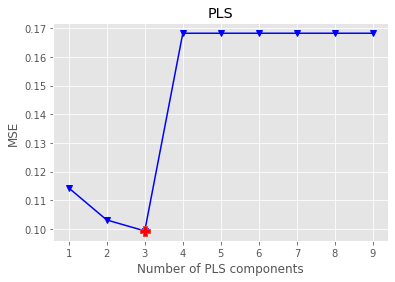

In [11]:
plot_metrics(mses, 'MSE', 'min')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.33, random_state=42)
pls = PLSRegression(n_components=3)
pls.fit(X_train,y_train)
y_pred = pls.predict(X_test).round(0)
accuracy_score(y_test,y_pred)

0.782608695652174

In [16]:
pls_score = pls.x_scores_
pls_score

array([[-0.47771517,  1.31187676, -0.21114597],
       [-1.9350204 , -0.36743486,  0.06137677],
       [ 0.98928458, -0.02984692,  0.19279483],
       [ 2.99630102,  0.14012171,  0.7592209 ],
       [ 0.5142951 , -2.11507181, -0.20468409],
       [ 1.88837001,  0.14115785, -2.04277492],
       [-1.9350204 , -0.36743486,  0.06137677],
       [ 0.38062963,  0.59993723,  0.91207622],
       [ 2.99630102,  0.14012171,  0.7592209 ],
       [-0.47771517,  1.31187676, -0.21114597],
       [ 2.99630102,  0.14012171,  0.7592209 ],
       [-1.9350204 , -0.36743486,  0.06137677],
       [ 0.5142951 , -2.11507181, -0.20468409],
       [-1.9350204 , -0.36743486,  0.06137677],
       [-1.9350204 , -0.36743486,  0.06137677],
       [-1.9350204 , -0.36743486,  0.06137677],
       [ 0.38062963,  0.59993723,  0.91207622],
       [-1.9350204 , -0.36743486,  0.06137677],
       [ 2.99630102,  0.14012171,  0.7592209 ],
       [-0.08578218,  0.01312069,  0.89270832],
       [ 0.15912739, -0.18906054, -0.271